### <font color='red'> Project 3 : Buzz Prediction on Twitter

Project Description:
- Use same datasets as Project 2.
- Run all the models only on 10% data. Use code given in Project 2 for sampling.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply four voting classifiers - two with hard voting and two with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project3_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project3_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project3_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataFrame = pd.read_table('Twitter.data',sep=',',header=None)

In [74]:
# As the dataset is quite large at first I run model on only 10% of it.
tenthOfDataFrame = dataFrame.sample(frac=0.01,random_state=0).reset_index().iloc[:,1:]

In [75]:
tenthOfDataFrame.describe()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
count,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,...,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000
mean,141.053326,136.002401,162.678841,181.423011,199.789266,221.774348,225.410494,69.183985,67.450789,81.002915,...,1.168386,1.189603,141.483368,136.391461,163.079047,181.836420,200.283951,222.277263,225.946502,196.410922
std,438.712622,426.153237,533.196749,555.452294,621.896394,666.538367,690.895893,173.178588,168.261770,213.589600,...,3.213424,3.693212,439.262821,426.669316,533.736567,556.036502,622.528389,667.150691,691.582457,660.082745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,4.000000,4.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,3.000000,4.000000,4.000000,6.000000,6.000000,4.500000
50%,17.000000,16.000000,20.000000,22.000000,26.000000,30.000000,29.000000,11.000000,11.000000,12.000000,...,1.000000,1.000000,18.000000,16.000000,20.000000,23.000000,26.000000,30.000000,29.000000,24.000000
75%,102.000000,101.000000,114.000000,126.000000,139.000000,163.000000,163.250000,58.000000,57.000000,65.000000,...,1.088235,1.081454,103.000000,101.000000,114.000000,127.000000,140.000000,163.000000,164.250000,134.500000
max,13713.000000,14108.000000,18643.000000,22077.000000,23557.000000,23099.000000,23424.000000,3849.000000,3343.000000,6431.000000,...,239.000000,272.000000,13713.000000,14108.000000,18644.000000,22078.000000,23564.000000,23103.000000,23430.000000,23929.000000


In [76]:
tenthOfDataFrame.shape

(5832, 78)

In [77]:
tenthOfDataFrame.head(10)

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0,4,2,0,0,14,3,0,2,1,...,1.000000,1.000000,0,4,2,0,0,14,3,21.5
1,12,14,12,15,37,36,43,9,8,3,...,1.055556,1.023256,12,14,12,15,37,36,43,37.0
2,111,123,172,106,198,312,130,63,53,109,...,1.003205,1.000000,111,123,172,107,201,312,130,119.0
3,23,12,23,20,23,39,33,18,12,19,...,1.025641,1.000000,24,12,23,20,23,39,33,32.5
4,13,108,35,43,19,63,66,11,81,25,...,1.000000,1.000000,13,108,35,43,19,63,66,38.0
5,55,83,76,62,56,92,85,34,64,51,...,1.000000,1.011765,55,83,77,62,56,92,85,92.0
6,488,539,735,621,646,779,496,348,364,448,...,1.057766,1.074297,490,540,738,621,647,779,498,755.0
7,1,4,7,7,9,3,13,1,1,6,...,1.000000,1.000000,1,4,7,7,9,3,13,3.0
8,6,4,4,7,7,8,7,5,2,4,...,1.000000,1.142857,6,4,4,7,7,8,7,4.5
9,1,6,8,4,5,8,5,0,2,1,...,1.000000,1.000000,1,6,8,4,5,8,5,4.5


In [78]:
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [79]:
X = tenthOfDataFrame.iloc[:,:77]
y = tenthOfDataFrame.iloc[:,77]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Decision Tree Regressor with Adaboost Boosting

In [10]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [11]:
decisionTreeRegressor = DecisionTreeRegressor(max_features='sqrt', splitter='random', min_samples_split=3, max_depth=5)
adaboostRegressor = AdaBoostRegressor(decisionTreeRegressor, learning_rate=0.05, loss='square', n_estimators = 2000)
adaboostRegressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='sqrt',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='random'),
         learning_rate=0.05, loss='square', n_estimators=2000,
         random_state=None)

In [12]:
adaboostTrainScore = adaboostRegressor.score(X_train,y_train)
adaboostTestScore = adaboostRegressor.score(X_test,y_test)

In [13]:
adaboostReport= [['Decision Tree Regressor with Adaboost Boosting',adaboostRegressor.estimators_,adaboostTrainScore,adaboostTestScore]]
columnNames = ['Model','Parameter','Train Score','Test Score']
pd.DataFrame(adaboostReport,columns=columnNames)

,Model,Parameter,Train Score,Test Score
0,Decision Tree Regressor with Adaboost Boosting,"[DecisionTreeRegressor(criterion='mse', max_de...",0.900095,0.715332


# Random Forest Regressor - Adaboosting Boosting 

In [61]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [62]:
randomForestRegressor = RandomForestRegressor(max_features=4, min_samples_split=4, n_estimators=75, min_samples_leaf=3)
randomAdaboost = AdaBoostRegressor(randomForestRegressor, learning_rate=0.05, loss='square', n_estimators=2000)
randomAdaboost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           n_estimators=75, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False),
         learning_rate=0.05, loss='square', n_estimators=2000,
         random_state=None)

In [63]:
randomAdaboostTrainScore = randomAdaboost.score(X_train,y_train)
randomAdaboostTestScore = randomAdaboost.score(X_test,y_test)

# Gradient Boosting Regressor

In [16]:
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [17]:
gradParamGrid = {'n_estimators':range(4,8),'max_depth': range(2,5),'learning_rate':[0.1, 0.05, 0.02],'random_state' : [1]}
gradGridSearch = GridSearchCV(GradientBoostingRegressor(),gradParamGrid,cv=5,return_train_score=True)
gradGridSearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(4, 8), 'max_depth': range(2, 5), 'learning_rate': [0.1, 0.05, 0.02], 'random_state': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [18]:
gradTrainScore = gradGridSearch.score(X_train,y_train)
gradTestScore = gradGridSearch.score(X_test,y_test)

In [20]:
gradReport= [['Gradient Boosting Regressor',gradGridSearch.best_params_,gradTrainScore,gradTestScore]]
columnNames = ['Model','Parameter','Train Score','Test Score']
pd.DataFrame(gradReport,columns = columnNames)

,Model,Parameter,Train Score,Test Score
0,Gradient Boosting Regressor,"{'learning_rate': 0.1, 'max_depth': 4, 'n_esti...",0.749534,0.681298


# PCA

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components = 0.95, whiten = True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=True)

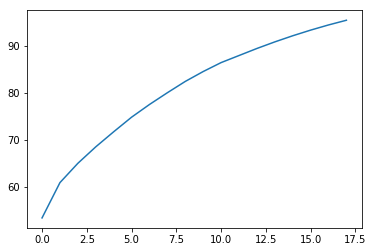

In [23]:
cumulativeVariances = np.cumsum(np.round(pca.explained_variance_ratio_*100, decimals=1))
plt.plot(cumulativeVariances)

In [24]:
pca_X_train = pca.transform(X_train)
pca_X_test = pca.transform(X_test)
print('Train Shape after PCA',pca_X_train.shape[1])
print('Test Shape after PCA',pca_X_test.shape[1])

Train Shape after PCA 18
Test Shape after PCA 18


# PCA : KNeighborsRegressor

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
knnParams = {'n_neighbors':range(3,9)}
knnGridSearch = GridSearchCV(KNeighborsRegressor(), knnParams, cv=5, return_train_score=True)
knnGridSearch.fit(pca_X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(3, 9)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [26]:
knnTrainScore = knnGridSearch.score(pca_X_train,y_train)
knnTestScore = knnGridSearch.score(pca_X_test,y_test)

In [28]:
knnReport = [['KNeighborsRegressor', knnGridSearch.best_params_, knnTrainScore, knnTestScore]]
pd.DataFrame(knnReport, columns=['Regression Task', 'Parameter','Train Score', 'Test Score'])

,Regression Task,Parameter,Train Score,Test Score
0,KNeighborsRegressor,{'n_neighbors': 3},0.889012,0.746776


In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

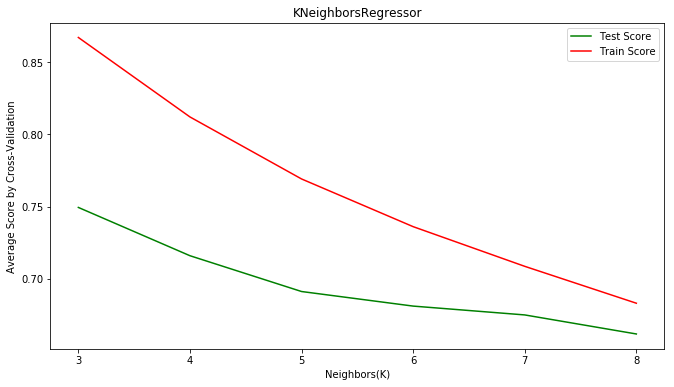

In [30]:
neighbors = [dict['n_neighbors'] for dict in knnGridSearch.cv_results_['params']]
plt.figure(figsize=(11, 6))
plt.plot(neighbors, knnGridSearch.cv_results_['mean_test_score'], label = 'Test Score', c = 'g')
plt.plot(neighbors, knnGridSearch.cv_results_['mean_train_score'], label = 'Train Score', c = 'r')
plt.xlabel('Neighbors(K)')
plt.ylabel('Average Score by Cross-Validation')
plt.title('KNeighborsRegressor')
plt.legend()

In [31]:
knnTrainScore = knnGridSearch.score(pca_X_train,y_train)
knnTestScore = knnGridSearch.score(pca_X_test,y_test)

In [32]:
knnReport = [['KNeighborsRegressor', knnGridSearch.best_params_, knnTrainScore, knnTestScore]]
pd.DataFrame(knnReport, columns=['Regression Task', 'Parameter','Train Score', 'Test Score'])

,Regression Task,Parameter,Train Score,Test Score
0,KNeighborsRegressor,{'n_neighbors': 3},0.889012,0.746776


# LinearRegression

In [33]:
from sklearn.linear_model import LinearRegression
LinearReg = LinearRegression()
LinearReg.fit(pca_X_train, y_train)
LinearRegTrainScore = round(LinearReg.score(pca_X_train, y_train), 5)
LinearRegTestScore = round(LinearReg.score(pca_X_test, y_test), 5)

In [34]:
LinearRegReport = [['LinearRegression','',LinearRegTrainScore, LinearRegTestScore]]
pd.DataFrame(LinearRegReport, columns=['Regression Task', 'Parameter','Train Score', 'Test Score'])

,Regression Task,Parameter,Train Score,Test Score
0,LinearRegression,,0.95687,0.83407


#  Ridge

In [35]:
from sklearn.linear_model import Ridge

In [36]:
ridgeTrainArray = []
ridgeTestArray = []

In [37]:
ridgeParams = {'alpha':[0.01,0.1,1,10,100]}
ridgeGridSearch = GridSearchCV(Ridge(), ridgeParams, cv=5, return_train_score=True)
ridgeGridSearch.fit(pca_X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [38]:
ridgeTrainScore = ridgeGridSearch.score(pca_X_train, y_train)
ridgeTestScore = ridgeGridSearch.score(pca_X_test, y_test)
ridgeBestParam = ridgeGridSearch.best_params_

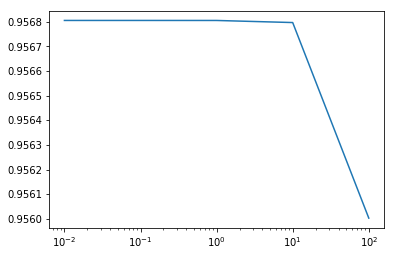

In [39]:
ridgeParamValues = [dict['alpha'] for dict in ridgeGridSearch.cv_results_['params']]
plt.plot(ridgeParamValues,ridgeGridSearch.cv_results_['mean_train_score'])
plt.xscale('log')

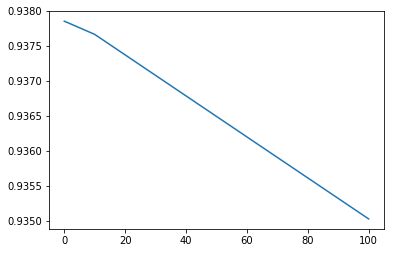

In [43]:
plt.plot(ridgeParamValues,ridgeGridSearch.cv_results_['mean_test_score'])

In [45]:
ridge_report = [['Ridge',ridgeBestParam,ridgeTrainScore,ridgeTestScore]]
pd.DataFrame(ridge_report,columns=['Regression Task', 'Parameter','Train Score', 'Test Score'])

,Regression Task,Parameter,Train Score,Test Score
0,Ridge,{'alpha': 0.01},0.95687,0.834069


# Lasso

In [46]:
from sklearn.linear_model import Lasso
lasso_param={'alpha':[2,5,10,100]}
lasso_grid_search = GridSearchCV(Lasso(),lasso_param,cv=5,return_train_score=True)
lasso_grid_search.fit(pca_X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [2, 5, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [47]:
lasso_train_score = lasso_grid_search.score(pca_X_train,y_train)
lasso_test_score = lasso_grid_search.score(pca_X_test, y_test)
lasso_param = lasso_grid_search.best_params_

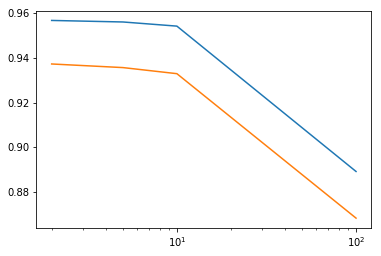

In [48]:
lasso_param_values = [dict['alpha'] for dict in lasso_grid_search.cv_results_['params']]
plt.plot(lasso_param_values,lasso_grid_search.cv_results_['mean_train_score'])
plt.xscale('log')
plt.plot(lasso_param_values,lasso_grid_search.cv_results_['mean_test_score'])

In [49]:
lasso_report = [['Lasso',lasso_param,lasso_train_score,lasso_test_score]]
pd.DataFrame(lasso_report,columns=['Regression Task', 'Parameter','Train Score', 'Test Score'])

,Regression Task,Parameter,Train Score,Test Score
0,Lasso,{'alpha': 2},0.956728,0.828824


# Polynomial Regression

In [81]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
pipe = Pipeline([('poly',PolynomialFeatures()),('linreg',LinearRegression())])

In [82]:
poly_param = {'poly__degree':[2,3]}
poly_grid_search = GridSearchCV(pipe,poly_param,cv=5,return_train_score=True)
poly_grid_search.fit(pca_X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linreg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'poly__degree': [2, 3]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [83]:
poly_train_score = poly_grid_search.score(pca_X_train,y_train)
poly_test_score = poly_grid_search.score(pca_X_test, y_test)
poly_param = poly_grid_search.best_params_

In [84]:
poly_report = [['Polynomial Regression',poly_param,poly_train_score,poly_test_score]]
pd.DataFrame(poly_report,columns=['Regression Task', 'Parameter','Train Score', 'Test Score'])

,Regression Task,Parameter,Train Score,Test Score
0,Polynomial Regression,{'poly__degree': 2},0.974474,-62.831135


# Linear SVR

In [50]:
from sklearn.svm import LinearSVR
linsvr_param={'C':[0.01,0.1,1,10,100]}
linsvr_grid_search = GridSearchCV(LinearSVR(),linsvr_param,cv=5,return_train_score=True)
linsvr_grid_search.fit(pca_X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [51]:
linsvr_train_score = linsvr_grid_search.score(pca_X_train,y_train)
linsvr_test_score = linsvr_grid_search.score(pca_X_test,y_test)
linsvr_params = linsvr_grid_search.best_params_

In [52]:
linsvr_report = [['Linear SVR',linsvr_params,linsvr_train_score,linsvr_test_score]]
pd.DataFrame(linsvr_report,columns=['Regression Task', 'Parameter','Train Score', 'Test Score'])

,Regression Task,Parameter,Train Score,Test Score
0,Linear SVR,{'C': 100},0.949296,0.830082


# RBF SVR

In [85]:
from sklearn.svm import SVR
rbfsvr_param={'C':[0.01,0.1,1,10,100], 'gamma':[0.01,0.1,1,10,100]}
rbfsvr_grid_search = GridSearchCV(SVR(kernel='rbf'),rbfsvr_param,cv=5,return_train_score=True)
rbfsvr_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [86]:
rbfsvr_train_score = rbfsvr_grid_search.score(pca_X_train,y_train)
rbfsvr_test_score = rbfsvr_grid_search.score(pca_X_test,y_test)
rbfsvr_params = rbfsvr_grid_search.best_params_

ValueError: X.shape[1] = 18 should be equal to 77, the number of features at training time

In [ ]:
rbfsvr_report = [['RBF SVR',rbfsvr_params,rbfsvr_train_score,rbfsvr_test_score]]
pd.DataFrame(rbfsvr_report,columns=['Regression Task', 'Parameter','Train Score', 'Test Score'])

# Final Report

In [ ]:
from IPython.display import display, HTML
pd.options.display.float_format = '{:.4f}'.format
final_report = pd.DataFrame(knn_report+Linreg_report+ridge_report+lasso_report+poly_report+linsvr_report+polysvr_report,columns=['Regression Task', 'Parameter','Train Score', 'Test Score'],index=range(1,8))
final_report

# Neural - Deep Learning

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(2, input_dim=77, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

seed = 10
np.random.seed(10)

model = KerasRegressor(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20] , 'epochs':[10, 50]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

grid_search_result = grid_search.fit(X_train, y_train)